<a href="https://colab.research.google.com/github/MohsenJadidi/ISLR/blob/master/Assignment2/Q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 2 - Q5 (logistic regression model, notMNIST)**
Statistical Learning Theory Course - Fall 2020 @ AUT

Author: MohammadMohsen Jadidi | email : mohsenjadidi@aut.ac.ir

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import os
import urllib.request
urllib.request.urlretrieve('https://raw.githubusercontent.com/MohsenJadidi/ISLR/master/Assignment2/notMNIST.npz', 'notMNIST.npz')

('notMNIST.npz', <http.client.HTTPMessage at 0x7f2aa34fc7f0>)

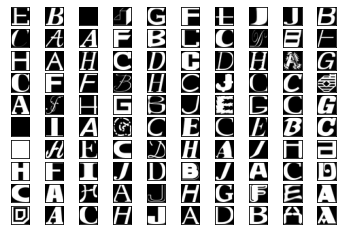

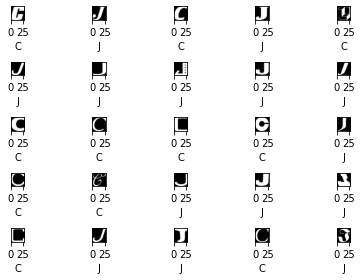

In [4]:
letter = 'A B C D E F G H I J'.split(" ") # letter = ['A', 'B', ..., 'I', 'J']
num = [i for i in range(len(letter))]
dic = dict(zip(num, letter))

with np.load("notMNIST.npz") as data :
    Data, Target = data ["images"], data["labels"]
    # Visualizing
    fig = plt.figure()
    for i in range(100):
        ax = fig.add_subplot(10,10,i+1)
        img = ax.imshow(Data[:,:,i*100], cmap='gray') 
        #ax.set_xlabel('A')
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
    #plt.tight_layout()    
    posClass = 2    # 2 = C 
    negClass = 9    # 9 = J
    dataIndx = (Target==posClass) + (Target==negClass)
    SubData = Data[:,:,dataIndx[:,0]]/(Data.max())
    SubTarget = Target[dataIndx].reshape(-1, 1)
    # Change 2 & 9 to 0 & 1
    SubTarget[SubTarget==posClass] = 1  # 1 = C 
    SubTarget[SubTarget==negClass] = 0  # 0 = J
    np.random.seed(521)
    randIndx = np.arange(SubData.shape[2])
    np.random.shuffle(randIndx)
    SubData, SubTarget = SubData[:,:,randIndx], SubTarget[randIndx]
    trainData, trainTarget = SubData[:,:,:3500], SubTarget[:3500]
    validData, validTarget = SubData[:,:,3500:3600], SubTarget[3500:3600]
    testData, testTarget = SubData[:,:,3600:], SubTarget[3600:]

fig = plt.figure()
for i in range(25):
    ax = fig.add_subplot(5,5,i+1)
    img = ax.imshow(trainData[:,:,i], cmap='gray') 
    if trainTarget[i] == 1:
        ax.set_xlabel('C')
    elif trainTarget[i] == 0:
        ax.set_xlabel('J')
    else:
        print("ERORR!!")
    
    ax.yaxis.set_visible(False)
    
plt.tight_layout() 